In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df_bts = pd.read_parquet("./../data/bts_on_time_v2.parquet", columns=["Tail_Number"])

unique_tail_numbers = df_bts["Tail_Number"].apply(lambda x: x[1:] if x.startswith("N") else x).unique()

len(unique_tail_numbers), unique_tail_numbers

(8972,
 array(['787AA', '795AA', '788AA', ..., '8869L', '762YX', '761YX'],
       dtype=object))

In [2]:
df_faa = pd.read_parquet("./../data/faa_joined.parquet")

df_faa

,N-NUMBER,SERIAL NUMBER,MFR MDL CODE,ENG MFR MDL,YEAR MFR,TYPE REGISTRANT,NAME,STREET,STREET2,CITY,...,TYPE-ENG,AC-CAT,BUILD-CERT-IND,NO-ENG,NO-SEATS,AC-WEIGHT,SPEED,TC-DATA-SHEET,TC-DATA-HOLDER,faa_registration_origin
0,1,680-0519,2076811,52041,2014,7,TENAX AEROSPACE LLC ...,400 W PARKWAY PL STE 201,,RIDGELAND,...,5.0,1.0,0.0,2.0,9.0,CLASS 3,0.0,,...,2023
1,100,5334,7100510,17003,1940,1,BENE MARY D ...,PO BOX 329,,KETCHUM,...,1.0,1.0,0.0,1.0,2.0,CLASS 1,67.0,,...,2023
2,10001,A28,9601202,67007,1928,1,STOOS ROBERT A ...,PO BOX 1056,,LAKELAND,...,1.0,1.0,0.0,1.0,3.0,CLASS 1,79.0,,...,2023
3,10004,T18208245,2072738,,,7,ETOS AIR LLC ...,PO BOX 288,,NEW LONDON,...,1.0,1.0,0.0,1.0,4.0,CLASS 1,0.0,,...,2023
4,10006,BG-72,1152020,17026,1955,1,COUTCHES ROBERT HERCULES DBA ...,550 AIRWAY BLVD,,LIVERMORE,...,1.0,1.0,0.0,1.0,4.0,CLASS 1,0.0,,...,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486829,99AY,,,,,None,ORTIZ LUIS ...,1612 E GREENLEAF ST,,ALLENTOWN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None,2015
486830,99KM,,,,,None,CANCELLED/NOT ASSIGNED ...,,,,...,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None,2015
486831,99LZ,,,,,None,CANCELLED/NOT ASSIGNED ...,,,,...,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None,2015
486832,99PH,,,,,None,CANCELLED/NOT ASSIGNED ...,,,,...,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None,2015


In [3]:
df_faa.columns

Index(['N-NUMBER', 'SERIAL NUMBER', 'MFR MDL CODE', 'ENG MFR MDL', 'YEAR MFR',
       'TYPE REGISTRANT', 'NAME', 'STREET', 'STREET2', 'CITY', 'STATE',
       'ZIP CODE', 'REGION', 'COUNTY', 'COUNTRY', 'LAST ACTION DATE',
       'CERT ISSUE DATE', 'CERTIFICATION', 'TYPE AIRCRAFT', 'TYPE ENGINE',
       'STATUS CODE', 'MODE S CODE', 'FRACT OWNER', 'AIR WORTH DATE',
       'OTHER NAMES(1)', 'OTHER NAMES(2)', 'OTHER NAMES(3)', 'OTHER NAMES(4)',
       'OTHER NAMES(5)', 'EXPIRATION DATE', 'UNIQUE ID', 'KIT MFR',
       ' KIT MODEL', 'MODE S CODE HEX', 'CODE', 'MFR', 'MODEL', 'TYPE',
       'HORSEPOWER', 'THRUST', 'CODE_aircraft', 'MFR_aircraft',
       'MODEL_aircraft', 'TYPE-ACFT', 'TYPE-ENG', 'AC-CAT', 'BUILD-CERT-IND',
       'NO-ENG', 'NO-SEATS', 'AC-WEIGHT', 'SPEED', 'TC-DATA-SHEET',
       'TC-DATA-HOLDER', 'faa_registration_origin'],
      dtype='object')

In [14]:
filtered_df_faa = df_faa[df_faa["N-NUMBER"].isin(unique_tail_numbers)]

print(
    len(filtered_df_faa),
    "/",
    len(unique_tail_numbers),
    "=",
    len(filtered_df_faa) / len(unique_tail_numbers),
)

8132 / 8972 = 0.9063753901025412


In [15]:
filtered_df_faa.describe()

,MODE S CODE,HORSEPOWER,THRUST,TYPE-ENG,AC-CAT,BUILD-CERT-IND,NO-ENG,NO-SEATS,SPEED,faa_registration_origin
count,8.132000e+03,7524.000000,7524.000000,7931.000000,7931.000000,7931.000000,7931.000000,7931.000000,7931.000000,8132.000000
mean,5.177941e+07,308.266481,21451.160420,4.858530,1.000504,0.061279,1.998991,163.177405,2.166183,2022.327718
std,1.069816e+06,792.212615,18367.652156,0.745163,0.031758,0.240905,0.312011,100.957605,22.500186,1.807201
min,5.000430e+07,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,5.071530e+07,0.000000,9140.000000,5.000000,1.000000,0.000000,2.000000,88.000000,0.000000,2023.000000
50%,5.177476e+07,0.000000,22700.000000,5.000000,1.000000,0.000000,2.000000,149.000000,0.000000,2023.000000
75%,5.273048e+07,0.000000,27300.000000,5.000000,1.000000,0.000000,2.000000,191.000000,0.000000,2023.000000
max,5.337235e+07,14500.000000,115540.000000,10.000000,3.000000,2.000000,8.000000,563.000000,438.000000,2023.000000


In [16]:
filtered_df_faa.isnull().sum()

N-NUMBER                     0
SERIAL NUMBER                0
MFR MDL CODE                 0
ENG MFR MDL                  0
YEAR MFR                     0
TYPE REGISTRANT            335
NAME                         0
STREET                       0
STREET2                      0
CITY                         0
STATE                        0
ZIP CODE                     0
REGION                       0
COUNTY                       0
COUNTRY                      0
LAST ACTION DATE             0
CERT ISSUE DATE              0
CERTIFICATION                0
TYPE AIRCRAFT                0
TYPE ENGINE                  0
STATUS CODE                  0
MODE S CODE                  0
FRACT OWNER                  0
AIR WORTH DATE               0
OTHER NAMES(1)             333
OTHER NAMES(2)             335
OTHER NAMES(3)             335
OTHER NAMES(4)             335
OTHER NAMES(5)             335
EXPIRATION DATE              0
UNIQUE ID                    0
KIT MFR                      0
 KIT MOD

In [17]:
filtered_df_faa["MODEL_aircraft"].nunique()

349

In [18]:
filtered_df_faa["MFR_aircraft"].nunique()

117

In [19]:
filtered_df_faa["TYPE REGISTRANT"].value_counts()

TYPE REGISTRANT
3    7225
7     444
1      96
4      21
5       5
        3
2       2
8       1
Name: count, dtype: int64

<Axes: xlabel='TYPE REGISTRANT', ylabel='count'>

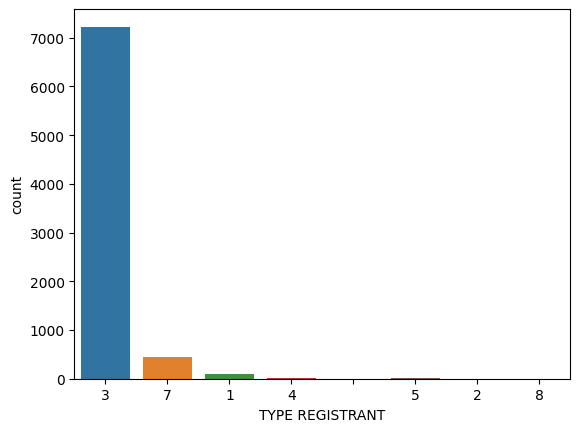

In [20]:
sns.countplot(data=filtered_df_faa, x="TYPE REGISTRANT")

# 1 - Individual
# 2 - Partnership
# 3 - Corporation
# 4 - Co-Owned
# 5 – Government
# 7 - LLC
# 8 - Non Citizen Corporation
# 9 - Non Citizen Co-Owned


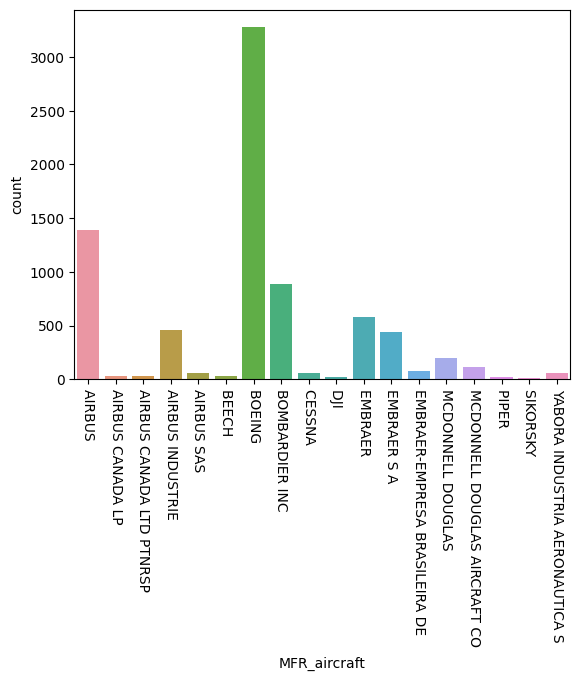

In [29]:
mfr_counts = filtered_df_faa["MFR_aircraft"].value_counts()

filtered_mfrs = mfr_counts[mfr_counts >= 15].index.tolist()

filtered_mfr = filtered_df_faa[
    filtered_df_faa["MFR_aircraft"].isin(filtered_mfrs)
].sort_values("MFR_aircraft")

sns.countplot(data=filtered_mfr, x="MFR_aircraft")

plt.xticks(rotation=-90)
plt.show()

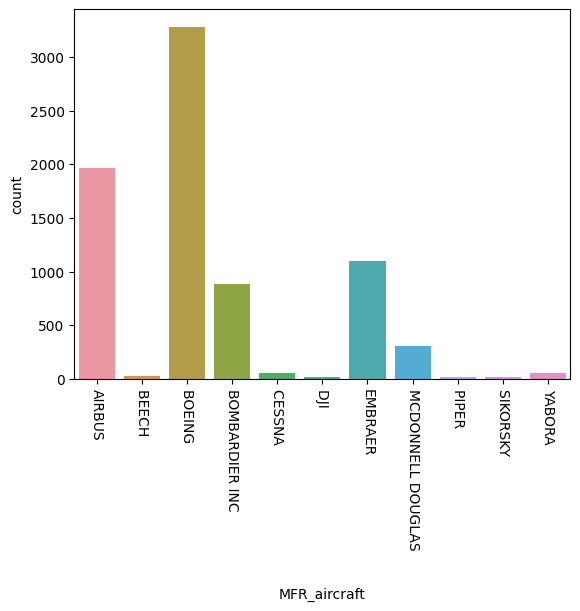

In [28]:
filtered_mfrs = mfr_counts[mfr_counts >= 15].index.tolist()

combined_mfr = filtered_df_faa[
    filtered_df_faa["MFR_aircraft"].isin(filtered_mfrs)
].sort_values("MFR_aircraft")

combined_mfr["MFR_aircraft"] = (
    combined_mfr["MFR_aircraft"]
    .replace(r".*AIRBUS.*", "AIRBUS", regex=True)
    .replace(r".*EMBRAER.*", "EMBRAER", regex=True)
    .replace(r".*MCDONNELL DOUGLAS.*", "MCDONNELL DOUGLAS", regex=True)
    .replace(r".*YABORA.*", "YABORA", regex=True)
)

sns.countplot(data=combined_mfr, x="MFR_aircraft")

plt.xticks(rotation=-90)
plt.show()